In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Slippage

In [165]:
def slippage(start_a, start_b):
    K = A * B
    down_a = np.arange(0.5*A, A) # for the scalability of the axis, can readjust
    up_a = np.arange(A, 3*A) # for the scalability of the axis, can readjust
    mat_a = np.concatenate((down_a, up_a), axis = 0)
    vol_b = np.round(K/mat_a, 3)
    price_a = np.round(vol_b/mat_a, 3)
    df = pd.DataFrame({'Token A': mat_a, 'Token B': vol_b, 'Price A w.r.t. B':price_a})
        
    # Subplots
    fig = plt.figure()
    ax0 = fig.add_subplot(111)
    ax0.plot(vol_b, mat_a, 'b', label = 'Conservation Function')
    ax0.grid()
    
    ax1 = ax0.twinx()
    ax1.plot(vol_b, price_a, 'g--', label = 'Price of Token A $w.r.t$ B (Exchange Rate)')
    
    ax0.set_xlabel('Volume of Token B')
    ax0.set_ylabel('Volume of Token A')
    ax1.set_ylim([0, 10])
    ax1.set_ylabel('Exchange Rate $A/B$')
    
    fig.legend()
    
    plt.savefig('token-ab.png')
    plt.show
    return df

,Token A,Token B,Price A w.r.t. B
0,5.0,40.000,8.000
1,6.0,33.333,5.555
2,7.0,28.571,4.082
3,8.0,25.000,3.125
4,9.0,22.222,2.469
5,10.0,20.000,2.000
6,11.0,18.182,1.653
7,12.0,16.667,1.389
8,13.0,15.385,1.183
9,14.0,14.286,1.020


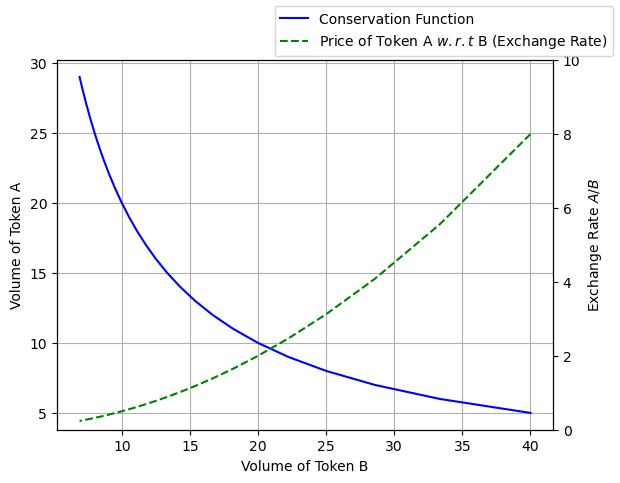

In [169]:
# Example
slippage(10,20)

# Impermanent Loss

Suppose token B is a stablecoin, 1 B = 1 USD

At the beginning, user LP deposits `x` A tokens and `y` B tokens,
and their deposit is `s`% of the total asset size in the pool.
A constant-product market maker maintains `K = Xtotal * Ytotal`.
Suppose initial price of A = `x_init` USD.
So their `initial capital = x * price_a + y * 1`.
When A's price in the market increases to trade_price USD due to market volatility,
arbitrageurs exchanges B to get cheaper A from the pool.
The trades change the composition of the tokens, assume the total A by the act of arbitrage becomes `xtot_after`.
User LP withdraws the share, receives profit because of the price difference.
However, if user LP keeps their assets outside the pool since the beginning,
their potential profit is supposedly higher.


In [168]:
def impermanent_loss(x, y, s, x_init, trade_price, xtot_after):
    # LP starting point
    share = s
    Xtotal = 1/share
    Atotal_init = Xtotal * x
    Btotal_init = Xtotal * y
    K = Atotal_init * Btotal_init

    # Initial price of token A in the market
    price_a_init = x_init
    deposit_a = price_a_init * A
    deposit_total = deposit_a + B
    print(f'LP X deposits: {A} A, price {price_a_init} USD each and {B} B.\n LP\'s total assets are worth {deposit_total} USD.')
    print(f'LP X holds {share}% in the pool.')
    print(f'Pre-trade: Total assets in the pool: A {Atotal_init}, B {Btotal_init}.')


    # After Trading
    price_a_after = trade_price
    print(f'Now, token A\'s market price: {price_a_after}.')

    # Arbitrary number 
    Atotal_after = xtot_after
    Btotal_after = K/Atotal_after
    print(f'After-trade/arbitrage: Total assets in the pool: A {Atotal_after}, B {Btotal_after}.')

    # LP A withdraws assets
    withdrawal_a = share * Atotal_after
    withdrawal_b = share * Btotal_after
    amount_withdrawal_a = price_a_after * share * Atotal_after
    withdrawal_total = amount_withdrawal_a + withdrawal_b
    profit = withdrawal_total - deposit_total
    print(f'LP X withdraws: {withdrawal_a} A, {withdrawal_b} B, total {withdrawal_total} USD.')

    # Unrealised potential
    unr_pot = price_a_after * A + B

    # Divergence Loss
    imp_loss = unr_pot - profit
    print(f'LP X makes profit: {profit} USD.')
    print(f'However, if LP X hadn\'t deposited it, they could have received {unr_pot} USD.')
    print(f'Impermanent loss is {div_loss} USD.')

In [167]:
# Example
impermanent_loss(x = 10, y=20, s=0.1, x_init=50, trade_price=100, xtot_after=80)

LP X deposits: 10 A, price 50 USD each and 20 B.
 LP's total assets are worth 520 USD.
LP X holds 0.1% in the pool.
Pre-trade: Total assets in the pool: A 100.0, B 200.0.
Now, token A's market price: 100.
After-trade/arbitrage: Total assets in the pool: A 80, B 250.0.
LP X withdraws: 8.0 A, 25.0 B, total 825.0 USD.
LP X makes profit: 305.0 USD.
However, if LP X hadn't deposited it, they could have received 1020 USD.
Impermanent loss is 715.0 USD.
